# Overview of Particle Physics Analysis with AMPT eventgenerator

> Harsh Shah, Email: harsh.shah@thep.lu.se

> Department of Astronomy and Theoretical Physics, Lund University

In [8]:
# All the libraries used in this notebook are mentioned in this cell
import csv
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import HTML, display, YouTubeVideo

## Introduction

From very early stage of human civilization, curiosity leads humans to various discoveries. From late 18th Century onwards our understanding of natural phenomena increased exponentially. When it comes to particle physics evolution of this field can be seen as chunks of years during which, discoveries of new particles and establishments of new theories took place. A much detailed historic overview of research in [Matter](https://en.wikipedia.org/wiki/Matter) can be viewed from the web-link. A very rough sketch of evolution of particle physics is shown here below in the time scale table:


Era of physics | Time scale | Important events
-----------------|----------|-----------------
Classical Era | 1897-1932 | A shift from Newtonian physics to Quantum physics
Years of photon | 1900-1924| Einsteins photo-electric effect
Mesons discoveries | 1934-1947| Yukawa mesons are proposed, $\pi$ meson discovered in 1947
Anti-particle detection | 1930-1956 | Dirac's theory predicts anti-particles, 1951 antiparticle was detected
Discovery of neutrinos | 1930-1962| 1953 via inverse $\beta$ decay reaction neutrino existance confirmed
Years of strange particles | 1947-1960 | End of 1947 mesons consist of strange quark discovered
Resonances | 1961- | 

In the physics terminology, there are four fundamental forces. Based upon these forces, various interactions in nature can be explained. In particle physics, guauge bosons are considered as mediating particles of different forces.

Force | Associated gauge boson
-------|----------------------
Gravitational | graviton (its yet not observed)
Electronmagnetic | $\gamma$ (photon)
Strong | g (gluons, they are 8 in total)
Weak | $W^{+}$, $W^{-}$ and Z

Since, at microscopic scale gravitational interaction is too weak compared to other forces, in particle physics it is not actively considered. Hence, in particle physics electro-weak and strong interactions are the core fields of research. From years of development of theory and experimental observations, today we have a theory which can explain most of the phenomena observed in particle physics. This theoretical model is known as [Standard Model](https://en.wikipedia.org/wiki/Standard_Model) of particle physics. Though it's not complete and it has various loop holes too. Some short comings of SM and basics of theories proposed to solve those problems can be read [here](https://en.wikipedia.org/wiki/Physics_beyond_the_Standard_Model).

In theoretical particle physics, physicists develop theories to explain certain natural phenomena, observations done at particle [colliders](https://en.wikipedia.org/wiki/Particle_accelerator) or to predict new phenomena which can be verified via experiments. One of the very exciting field of such studies is relativistic heavy-ion (HI) collisions. In HI physics bunch of heavy- nucleus e.g. Au, Pb are smashed at relativistic energies. The out come of such collisions is large number of final state hadrons at detectors. Since total center of mass energy in such collisions is very large, analysing these final state particles, physicists expect to learn about much fundamental aspects related to origin of the Universe. Much often HI collision physics is compared with study of early universe. An example of such comparison can be seen in the image below [1].
![](HI-a.png)

There are two leading collider facilities for HI phyiscs in the world. Relativistic heavy-ion collider (RHIC) and Large hadron collider (LHC). At HI colliders, there are some unexpected phenomena like strageness enhansment and jet quenching has been observed. These observations lead theoriests to predict formation of Quark-Gluon-Plasma([QGP]https://en.wikipedia.org/wiki/Quark%E2%80%93gluon_plasma). This QGP is also known as a state of non-interacting quarks and gluons and formation of most ideal liquid. Most of the theoretical models developed to explain this phenomena are hydrodynamic and thermodynamic based. A small video mentioning about QGP from RHIC can be seen below:

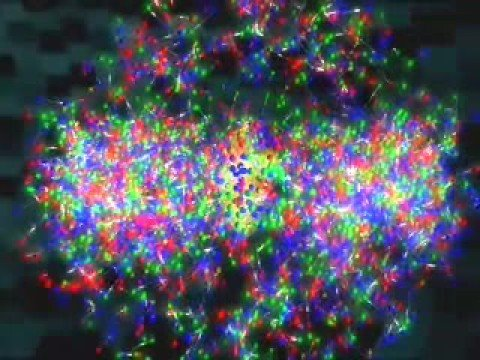

In [14]:
YouTubeVideo('7kChj3Wu4G0')

To understand experimental observations more often event generators are used. The purpose of event generators is to generate simulated events based on theory predictions and phenomenology. This event simulation is done via few primary stages e.g. particle collision and production of particles based on interaction cross section, initial and final state radiations,hadronization and decay of unstable hadrons. If user wants to compare simulated events with experimental data appropriate vetos are required based upon individual detectors. Often dedicated softwares are used to replicate detector geometry and simulation outputs are provided as inputs to these softwares at the final stage of event simulation before storing the generated events. At this stage only those hadrons and bosons are been stored which can satisfy criteria based on detector geometry and threshold parameters.

There are few general purpose event generators, which are capable of reproducing most of the collider physics observations qualitatively e.g. Pythia8, Herwig, Sherpa. But there are some physics specific event generators too. Such event generators are mainly used to study exclusive physics phenomena only. Some of these can be used as external plug-ins to general purpose event generators mentioned above. Here, in this notebook I tried to explain basics of event analysis with an event generator used in heavy-ion physics analysis. I chose an event generator named as multiphase transport (AMPT) model. I will go through a quick overview of this model and show some basic histograms generated with this model.

## AMPT model
To explain and understand experimental results of heavy ion collisions at RHIC and LHC, many theoretical models have been introduced. Thermal models based on global thermal and chemical equilibrium. Hydrodynamic models based on local thermal equilibrium. Transport models treat nonequilibrium dynamics explicitly. Among these different models to address non-equilibrium many body dynamics, Lin and his collaborators developed a multiphase transport (AMPT) model [2]. It includes both initial partonic and final hadronic interactions and transition between these two phases of matter. The AMPT model is constructed to describe nuclear collisions ranging from p+ A to A+ A centre of mass energies varies from 5 to 5500 GeV.

The AMPT model consists of four main components: the initial condition, partonic interactions, conversion of partonic to the hadronic matter and hadronic interactions. Initial conditions, includes spatial and momentum distributions of minijet partons and soft string excitations, are obtained from the heavy ion jet interaction generator (HIJING) model. Scattering among partons are modelled by Zhang’s parton cascade (ZPC). This includes only two body scatterings with cross section obtained from pQCD with screening mass. In default AMPT parton to hadron conversion is done using the Lund String fragmentation model. In the AMPT string melting model a quark coalescence model is used. The dynamics of hadrons is described by a hadronic cascade, which is based on the ART model.

Minijet parton production from the hard scatterings in the HIJING model can loss energy by gluon splitting and transfer their energies to the nearby soft strings. In the AMPT model, this jet quenching in the HIJING is replaced by parton scattering in ZPC. Only two body scatterings are included in ZPC, higher order contributions to the jet energy loss are still missing in the AMPT model.

AMPT model can be used in two different mode of event generation.

Type of mode| Speciality
--------------|-----------
AMPT-default| Events are generated with mechanism where QGP formation is not assumed
AMPT-string melting| Events are generated with considering QGP formation

A diagramatic over-view of these two variations of event generation can be seen in the two imagies below.

In [15]:
#![alt](AMPT-d.png) | ![alt](AMPT-s.png)

display(HTML("<table><tr><td><img src='AMPT-d.png'><figcaption>AMPT-default</figcaption></td><td><img src='AMPT-s.png'><figcaption>AMPT-string-melting</figcaption></td></tr></table>"))

AMPT-default,AMPT-string-melting


Input file to generate simulations is known as input.ampt. A short outline of this file can be gain from below. It's just meant to get an idea of which input parameters goes into the event generator while generating events. Most of the variable names are self-explained. e.g. first line shows nucleon-nucleon energy in GeV in the collision, In the second line frame of collision can be defined, in third and fourth line type of projectile and target nucleus and rest 4 lines are to define A and Z numbers of colliding nucleus. There are several other more techniqcal parameters in the file too.

In [14]:
!head -n 8 input.ampt # For complite list of input parameters either increase line numbers or open the file seperately

20          ! EFRM (sqrt(S_NN) in GeV)
CMS             ! FRAME
A               ! PROJ
A               ! TARG
197             ! IAP (projectile A number)
79              ! IZP (projectile Z number)
197             ! IAT (target A number)
79              ! IZT (target Z number)


In [17]:
# A sample event output file using AMPT event generator is been called
!head -n 5 tmp.dat

 17      1  10583    2.1652      199 187   3 196   1 186
    22    1.046    0.043      0.011  0.000    -2.82     0.68     0.01     1.00
    22   -0.131    0.007     -0.005  0.000    -0.95    -1.12    -0.03     1.00
    22   -0.147    0.337     -0.015  0.000     1.45     1.40    -0.03     1.00
    22    0.016   -0.442     -0.023  0.000     4.73    -3.67    -0.04     1.00


Digits in the first line represents:
Event's initiation parameters. Important digit is placed in third place. It represents number of generated particles in the single collision.

Digits in the second line onwards:
Various particle properties. For this notebook we will only focus on first five parameters, which are PID, Px, Py, Pz and mass respectively. Px, Py, Pz are particle's momentum values in x, y and z coordinates respectively.  PID=Particle Identification Number, it is universal number system used in all the events generators to tag generated particles. From PID user can gain information about type of particles.

Some important PID and their particle tagging is listed below:

PID | Particle name| PID | Particle name
----|--------------|-----|--------------
22 | Photon | 11| electron
111 | $\pi^{0}$ | 211| $\pi^{+}$
311 | $K^{0}$ | 321 | $K^{+}$
2212 | proton | 2112 | neutron

For anti-particles PID is provided with negative sign e.g. PID =-11 for positron.


In [ ]:
clist = [x[:x.index('\t')] if '\t' in x else x for x in lst]
print (clist[2])


In [18]:
PID, px, py, pz, mass, x, y, z, u = np.loadtxt('tmp.dat',unpack=True, skiprows=1)

In [21]:
print(type(PID), PID.size)

Pt = np.sqrt(px**2 + py**2)
Ptot = np.sqrt(Pt**2 + pz**2)
E = np.sqrt(Ptot**2 + mass**2)
rapidity = 0.5*np.log((E+pz)/(E-pz))

<class 'numpy.ndarray'> 10583


From the momentum and mass of particles, above mentioned quantities can be calculated. Based upon calculated parameters like rapidity angle $\theta$ of produced particles can also be obtained. Information obtained about $\theta$ and $\phi$ helps to obtain angular distribution of particles as well as relative angular distribution can also be calculated.           

In the two cells below I have ploted 2D histograms for all the parameters with respect to mass. From the rapidity histogram one can observe that light particles covers whole detector span, but heavy particles remains close into rapidity = 0 or perpendicular to the the beam axes. This can also be verified from almost zero longitudinal ($P_{Z}$) momentum of heavy particles.

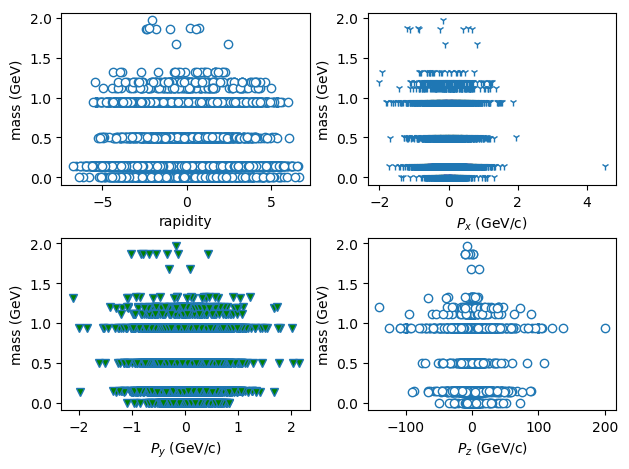

In [94]:
rap = plt.subplot2grid((4, 8), (0,0), rowspan=2, colspan=4)
rap.plot(rapidity, mass, lw=0, marker='o', mfc='w')

#plt.plot(rapidity, mass, lw=0, marker='o', mfc='w')
#plt.legend(title='[quencher]',labelspacing=.7)
# plt.xlabel('$P_{z}$');

px1 = plt.subplot2grid((4, 8), (0, 4), rowspan=2, colspan=4)
py2 = plt.subplot2grid((4, 8), (2, 0), rowspan=2, colspan=4)
pz3 = plt.subplot2grid((4, 8), (2, 4), rowspan=2, colspan=4)

px1.plot(px, mass, lw=0, marker='1', mfc='w'); py2.plot(py, mass, lw=0, marker='v', mfc='g')
pz3.plot(pz, mass, lw=0, marker='o', mfc='w')

rap.set_ylabel('mass (GeV)'); rap.set_xlabel('rapidity')
px1.set_ylabel('mass (GeV)'); px1.set_xlabel('$P_{x}$ (GeV/c)')
py2.set_ylabel('mass (GeV)'); py2.set_xlabel('$P_{y}$ (GeV/c)')
pz3.set_ylabel('mass (GeV)'); pz3.set_xlabel('$P_{z}$ (GeV/c)')

plt.tight_layout(w_pad=.2,h_pad=.2)
plt.show()

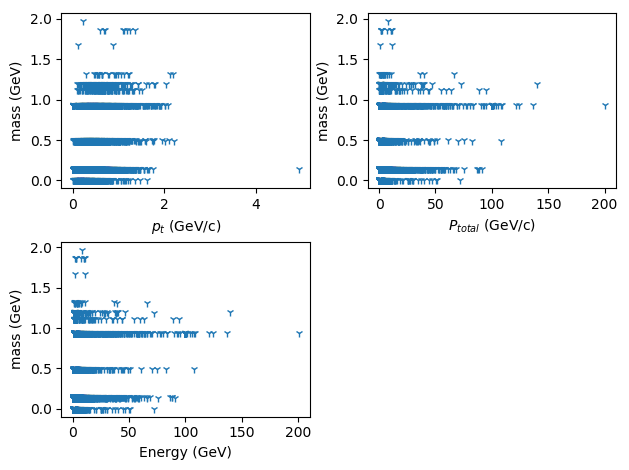

In [96]:
pt4 = plt.subplot2grid((4, 8), (0, 0), rowspan=2, colspan=4)
ptot5 = plt.subplot2grid((4, 8), (0, 4), rowspan=2, colspan=4)
E6 = plt.subplot2grid((4, 8), (2, 0), rowspan=4, colspan=4)

pt4.plot(Pt, mass, lw=0, marker='1', mfc='w')
ptot5.plot(Ptot, mass, lw=0, marker='1', mfc='w'); E6.plot(E, mass, lw=0, marker='1', mfc='w')

pt4.set_ylabel('mass (GeV)'); pt4.set_xlabel('$p_{t}$ (GeV/c)')
ptot5.set_ylabel('mass (GeV)'); ptot5.set_xlabel('$P_{total}$ (GeV/c)')
E6.set_ylabel('mass (GeV)'); E6.set_xlabel('Energy (GeV)')

plt.tight_layout(w_pad=.2,h_pad=.2)
plt.show()

In [45]:
# Count total number of particles of certain type
count = 0
for i, j in enumerate(PID):
    if (j==22):
            count += 1
    
print(count)
#print(PID[2])

689


From above histograms one can learn about various properties of identified particles since all the histograms are plotted with respect to rest mass of the particles and horizontal lines can be identified as representation of individual particles.

Here, below I just tried to show how transverse momentum distribution looks like for all the particles. One can change variable "$P_{t}$" to some other variable mentioned above and observe variations in distribution of the respective parameter.

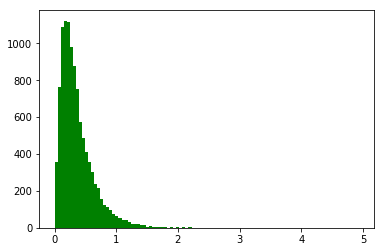

In [80]:
n, bins, patches = plt.hist(Pt, 100, facecolor='green')
#plt.axis([0, 100, 0, 5000]) # [xmin, xmax, ymin, ymax]
plt.show()

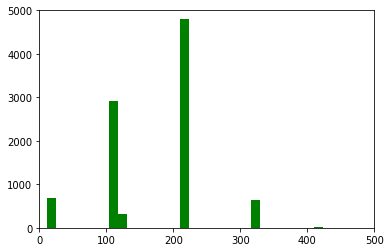

In [96]:
n, bins, patches = plt.hist(abs(PID), 250, facecolor='green')
plt.axis([0, 500, 0, 5000]) # [xmin, xmax, ymin, ymax]
plt.show()

first [   22.    22.    22. ...,  2212.  -211.  -211.]
second [ 1.046 -0.131 -0.147 ..., -0.195 -0.112  0.137]
last [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   1.74426000e+03
   3.60000000e+06   2.50182000e+03]


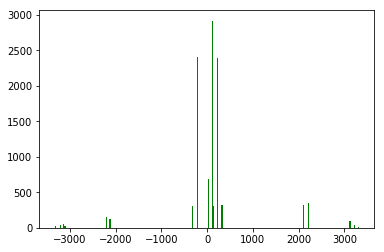

In [116]:
d = np.loadtxt('tmp.dat',unpack=True, skiprows=1)
print('first', d[0])
print('second', d[1])
print('last', d[8])
n, bins, patches = plt.hist(d[0], 250, facecolor='green')
plt.show()

## Conclusion
I tried to provide a very basic over-view of how particle physics analysis been done with use of event generator. In real world there are very many particles which decay much before they could reach and been detected at the detectors. Such unstable hadrons are known as resonance particles. I haven't discussed how such particles are been reconstructed and studied. I also avoided much complex analysis which leads to study of QGP like structure signatures. At department of theoretical particle physics, Lund University, we used to study various phenomena of collider physics via event generators. [Pythia8](http://home.thep.lu.se/~torbjorn/pythia82html/Welcome.html) is a globally renovelled and widely used event generator which is developed here at Lund University. We are also moving ahead with adding a new model for heavy-ion physics in Pythia8. Our approach for heavy-ion physics study is a bit different than conventional hydrodynamic based studies.

## References
1.  Searching for Superhorizon Fluctuations in Heavy-Ion Collisions - Sorensen, Paul arXiv:0808.0503 [nucl-ex]

2. A Multi-Phase Transport Model for Relativistic Heavy Ion Collisions- Lin etel  arXiv:nucl-th/0411110v3 [ nucl-th]